In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(style="ticks")

In [24]:
data = pd.read_csv('travel-times.csv')

In [25]:
data.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [26]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')
data = data.drop(['Comments'], axis=1)

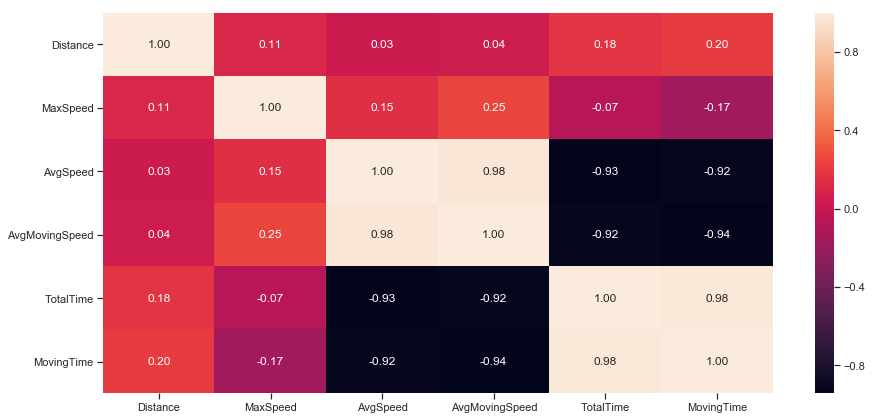

In [27]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

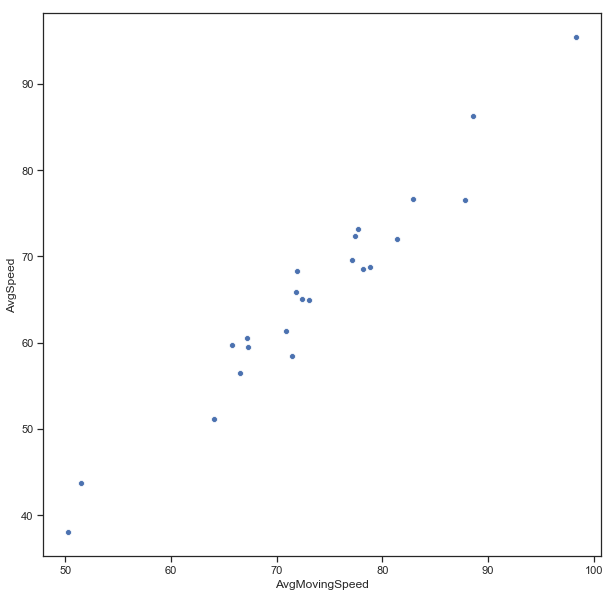

In [28]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='AvgMovingSpeed', y='AvgSpeed', data=data)

In [29]:
data=data.drop(['Date','StartTime','GoingTo','DayOfWeek','Take407All'],axis=1)

In [30]:
X = data.drop(['AvgSpeed'], axis=1)
Y = data['AvgSpeed']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)
X_train.head()

,Distance,MaxSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime
156,49.18,123.0,81.4,8.37,41.0,36.3
189,51.28,122.1,51.5,8.45,70.5,59.8
166,49.02,128.4,82.9,8.54,38.4,35.5
92,50.58,128.4,67.3,8.75,51.0,45.1
78,52.87,123.5,72.4,8.97,48.7,43.8


c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9660085432281734
0.780077957611601


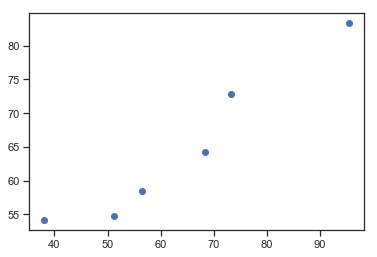

In [32]:
rf = RandomForestRegressor().fit(X_train,y_train)
p = rf.predict(X_test)
plt.scatter(y_test,p)
print(rf.score(X_train,y_train))
print(rf.score(X_test, y_test))

0.9999999740335803
0.7907514227595915


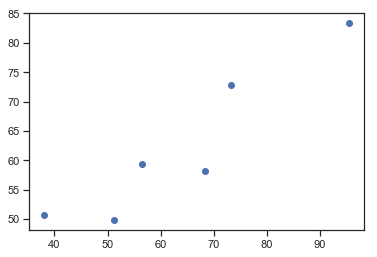

In [33]:
gb = GradientBoostingRegressor().fit(X_train, y_train)
p = gb.predict(X_test)
plt.scatter(y_test,p)
print(gb.score(X_train, y_train))
print(gb.score(X_test,y_test))

<h1>Подбор гиперпараметра</h1>

In [38]:
# Градиентный спуск
from sklearn.model_selection import GridSearchCV
gb_grid= GridSearchCV(GradientBoostingRegressor(),{'n_estimators':np.arange(1,200,20), 'max_depth': np.arange(1,20,2)},cv=10)
gb_grid.fit(X_train,y_train)
print('Точность: ',gb_grid.best_score_ )

Точность: 0.6327810642552248


In [40]:
# Рандом форест
rf_grid= GridSearchCV(RandomForestRegressor(),{'n_estimators':np.arange(1,200,20), 'max_depth': np.arange(1,20,2)},cv=10)
rf_grid.fit(X_train,y_train)
print('Точность: ',rf_grid.best_score_ )

Точность: 0.6327045113400128
